Problem Statement:

Refer Social Network Ad Dataset. 
Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using Naïve Bayes classifier to predict whether customers will purchase the product or not based on the features available in the dataset. Analyse the performance of the model with suitable evaluation measures and generate classification reports

# Naive Bayes classification with Python

We'll try to use Naive Bayes to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated saraly.

Let's grab it and use it!

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Get the Data

In [3]:
dataset=pd.read_csv(r'Z:\Purva226518_2sem\Machine Lear\Assi 4\Social_Network_Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Check for null values

In [6]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
dataset.drop(['Gender','User ID'], axis=1, inplace=True)

## Check correlation

<AxesSubplot:>

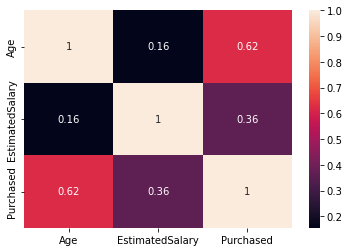

In [8]:
sns.heatmap(dataset.corr(),annot=True)

## Standardize the Variables



In [9]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(dataset.drop('Purchased',axis=1))

StandardScaler()

In [13]:
scaled_features = scaler.transform(dataset.drop('Purchased',axis=1))

In [14]:
type(scaled_features)

numpy.ndarray

In [15]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary'])
df_feat.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,dataset['Purchased'],
                                                    test_size=0.30)

## Using Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [19]:
y_pred = classifier.predict(X_test)

## Predictions and Evaluations


In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [21]:
cm

array([[71,  6],
       [11, 32]], dtype=int64)

In [22]:
accuracy_score(y_test,y_pred)

0.8583333333333333